# TP 1 Análisis de Series Temporales
Lijtmaer - Gaddi - Brusasca - Duran - Palavecino

In [70]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
import matplotlib
import pmdarima
import statsmodels.tsa.stattools as tsa

In [72]:
ticker_list = ['NVDA']

datanvda = yf.download(ticker_list, start='2023-01-01', end='2025-07-29')[['Close']]
precios_ajustados = datanvda.rename(columns={'Close': 'Adj_Close'})

precios_ajustados.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj_Close
Ticker,NVDA
Date,
2023-01-03,14.302287
2023-01-04,14.735900
2023-01-05,14.252332
2023-01-06,14.845802
2023-01-09,15.614120


In [73]:
precios_ajustados.shape

(643, 1)

In [74]:
precios_ajustados.describe()

Price,Adj_Close
Ticker,NVDA
count,643.000000
mean,85.335183
std,44.851502
min,14.252332
25%,43.894793
50%,88.753670
75%,126.390076
max,176.750000


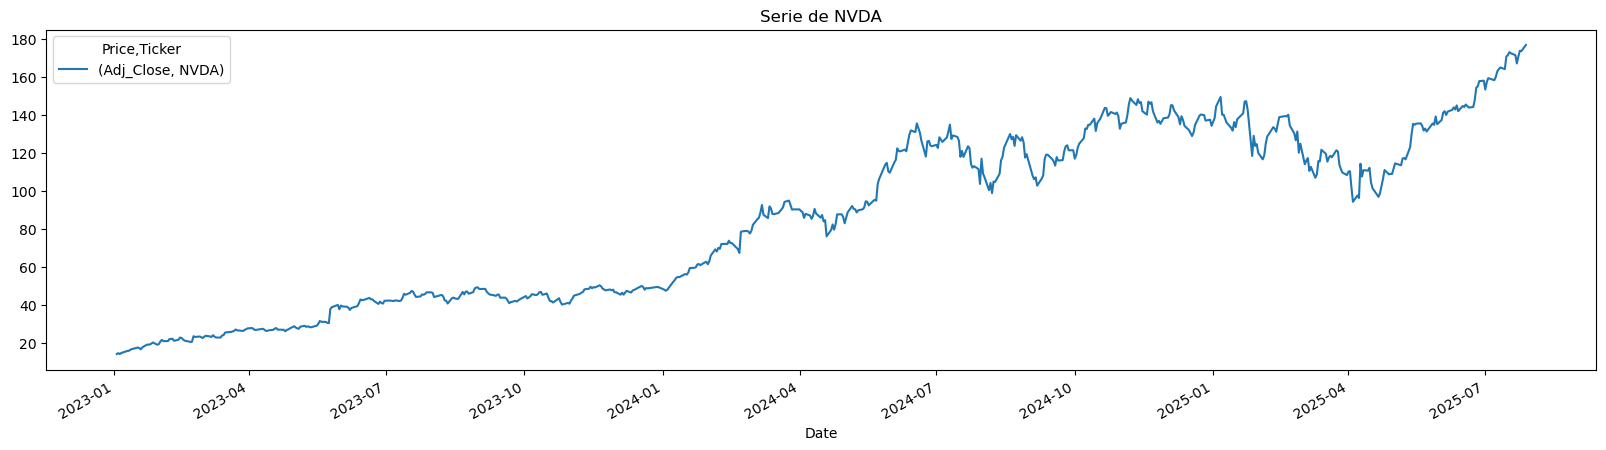

In [75]:
precios_ajustados.plot(figsize=(20,5), title = "Serie de NVDA")
plt.show()

Descomposición con period = 21


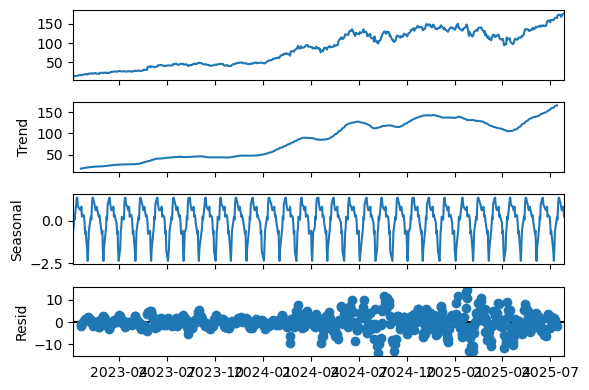

Descomposición con period = 63


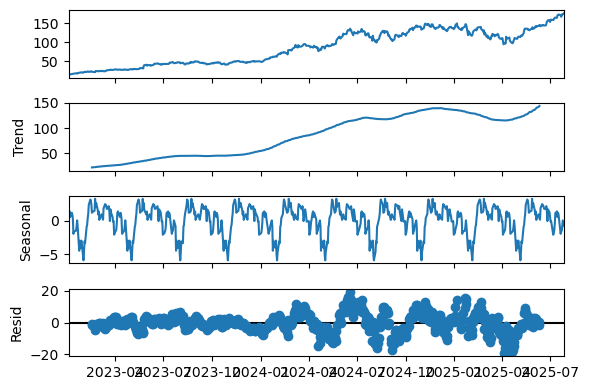

Descomposición con period = 126


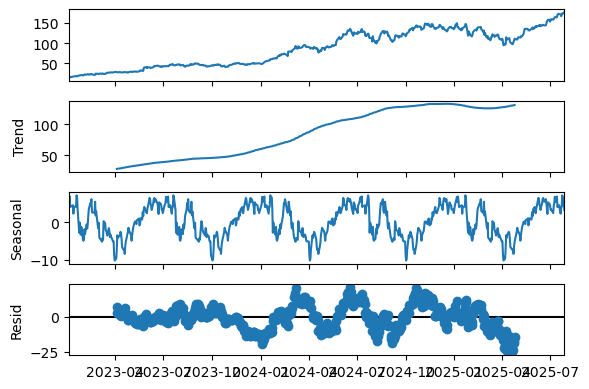

Descomposición con period = 252


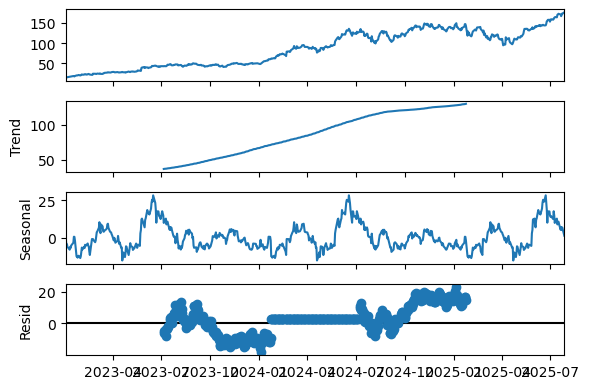

In [76]:
for p in [21, 63, 126, 252]:
    result = seasonal_decompose(precios_ajustados['Adj_Close'], model='additive', period=p)
    print(f"Descomposición con period = {p}")
    result.plot()
    plt.show()

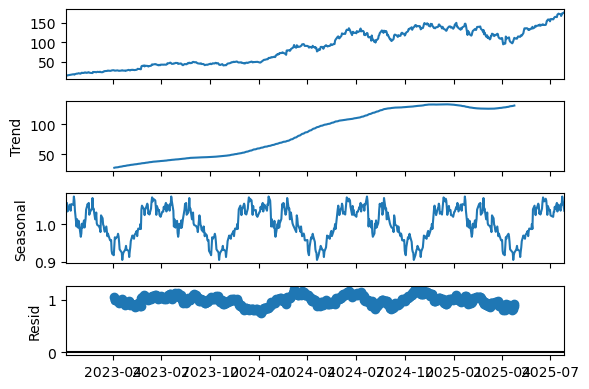

In [77]:
# Realizar la descomposición estacional multiplicativa
result = seasonal_decompose(precios_ajustados['Adj_Close'], model='multiplicative' , period=126)

# Graficar los resultados
result.plot()
plt.show()

In [78]:
matplotlib.rcParams['figure.figsize']=[6.0,4.0]

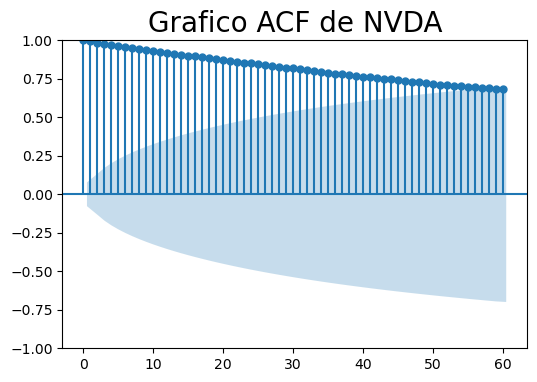

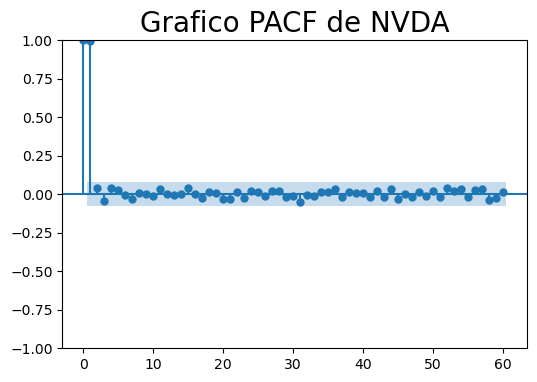

In [79]:
plot_acf(precios_ajustados.Adj_Close,lags=60)
plt.title("Grafico ACF de NVDA", size= 20)
plot_pacf(precios_ajustados.Adj_Close,lags=60)
plt.title("Grafico PACF de NVDA", size= 20)
plt.show()

# vemos datos no estacionarios

In [89]:
tsa.adfuller(precios_ajustados['Adj_Close'], regression='ct',autolag='AIC')

(-2.2806307911931767,
 0.44469169393699365,
 3,
 639,
 {'1%': -3.973007741495605,
  '5%': -3.4173830390742204,
  '10%': -3.131106020688317},
 3192.4022395791503)

In [90]:
print(pmdarima.arima.ndiffs(precios_ajustados['Adj_Close']))

1


In [91]:
nvda_diff=precios_ajustados['Adj_Close'].copy()
nvda_diff=nvda_diff.diff(axis = 0, periods = 1)

In [92]:
print(pmdarima.arima.ndiffs(nvda_diff.dropna()))

0


In [94]:
tsa.adfuller(nvda_diff.dropna(), regression='ct',autolag='AIC')

(-15.322864106164431,
 1.5890092929019084e-22,
 2,
 639,
 {'1%': -3.973007741495605,
  '5%': -3.4173830390742204,
  '10%': -3.131106020688317},
 3191.384221028005)

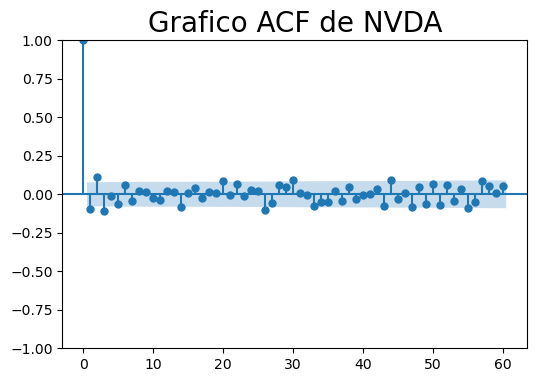

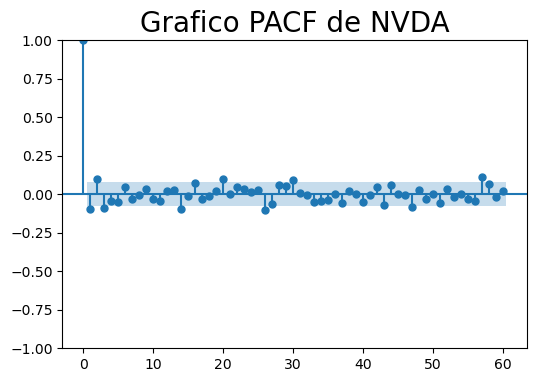

In [95]:
plot_acf(nvda_diff.dropna(),lags=60)
plt.title("Grafico ACF de NVDA", size= 20)
plot_pacf(nvda_diff.dropna(),lags=60)
plt.title("Grafico PACF de NVDA", size= 20)
plt.show()